## 4) How long some of the real-estate stays on the market before they rent or sell?

1. Importing the required libraries for EDA

In [55]:
# %pip install pandas
# %pip install numpy
# %pip install seaborn
%pip install geopandas contextily

Note: you may need to restart the kernel to use updated packages.


In [56]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
import geopandas as gpd
# import contextily
%matplotlib inline     
sns.set(color_codes=True)

2. Loading the data into the data frame

In [57]:
import os
os.getcwd()

'C:\\Users\\asus\\Desktop\\mengyuan\\data preparation'

3. Days to Pending: How long it takes homes in a region to change to pending status on Zillow.com after first being shown as for sale. The reported figure indicates the number of days (mean or median) that it took for homes that went pending during the week being reported, to go pending. This differs from the old “Days on Zillow” metric in that it excludes the in-contract period before a home sells.

In [58]:
# Mean days of pending (monthly)
df1 = pd.read_csv("Metro_mean_doz_pending_uc_sfrcondo_sm_month.csv")
# To display the top 5 rows 
df1.head(5)   

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,102001,0,United States,country,NaN,51.0,48.0,45.0,43.0,44.0,...,49.0,52.0,49.0,43.0,39.0,37.0,38.0,41.0,44.0,46.0
1,394913,1,"New York, NY",msa,NY,68.0,65.0,63.0,64.0,66.0,...,68.0,71.0,67.0,58.0,51.0,49.0,49.0,52.0,55.0,58.0
2,753899,2,"Los Angeles, CA",msa,CA,35.0,32.0,31.0,32.0,33.0,...,40.0,41.0,37.0,33.0,30.0,29.0,30.0,33.0,36.0,38.0
3,394463,3,"Chicago, IL",msa,IL,51.0,44.0,40.0,39.0,40.0,...,42.0,43.0,38.0,31.0,26.0,24.0,24.0,25.0,28.0,31.0
4,394514,4,"Dallas, TX",msa,TX,46.0,42.0,38.0,37.0,38.0,...,51.0,52.0,49.0,43.0,39.0,38.0,40.0,45.0,50.0,54.0


In [59]:
# Median days of pending
df2 = pd.read_csv("Metro_med_doz_pending_uc_sfrcondo_sm_month.csv")
# To display the top 5 rows 
df2.head(5)   

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,102001,0,United States,country,NaN,31.0,21.0,19.0,18.0,20.0,...,27.0,25.0,20.0,14.0,13.0,14.0,15.0,18.0,20.0,21.0
1,394913,1,"New York, NY",msa,NY,58.0,43.0,38.0,40.0,43.0,...,37.0,36.0,30.0,23.0,21.0,22.0,24.0,26.0,28.0,28.0
2,753899,2,"Los Angeles, CA",msa,CA,17.0,14.0,15.0,15.0,17.0,...,19.0,18.0,15.0,13.0,13.0,14.0,15.0,16.0,18.0,20.0
3,394463,3,"Chicago, IL",msa,IL,32.0,17.0,15.0,16.0,18.0,...,18.0,17.0,12.0,7.0,7.0,7.0,8.0,9.0,11.0,13.0
4,394514,4,"Dallas, TX",msa,TX,27.0,21.0,20.0,20.0,22.0,...,32.0,29.0,23.0,16.0,15.0,17.0,20.0,25.0,30.0,33.0


Days to Close (mean/median): Number of days between the listing going pending and the sale date.

In [60]:
# Mean days to close
df3 = pd.read_csv("Metro_mean_days_to_close_uc_sfrcondo_sm_month.csv")
# To display the top 5 rows 
df3.head(5)   

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30
0,102001,0,United States,country,NaN,35.0,34.0,34.0,35.0,36.0,...,33.0,34.0,34.0,33.0,32.0,33.0,34.0,34.0,34.0,34.0
1,394913,1,"New York, NY",msa,NY,57.0,53.0,50.0,51.0,53.0,...,53.0,54.0,55.0,54.0,52.0,51.0,53.0,54.0,55.0,55.0
2,753899,2,"Los Angeles, CA",msa,CA,34.0,32.0,33.0,33.0,34.0,...,30.0,31.0,30.0,30.0,29.0,29.0,29.0,29.0,29.0,30.0
3,394463,3,"Chicago, IL",msa,IL,43.0,42.0,42.0,44.0,45.0,...,37.0,38.0,37.0,37.0,36.0,37.0,38.0,38.0,38.0,37.0
4,394514,4,"Dallas, TX",msa,TX,21.0,21.0,21.0,22.0,22.0,...,28.0,28.0,28.0,28.0,28.0,28.0,29.0,29.0,29.0,28.0


In [61]:
# Median days to close
df4 = pd.read_csv("Metro_median_days_to_close_uc_sfrcondo_sm_month.csv")
# To display the top 5 rows 
df4.head(5)   

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30
0,102001,0,United States,country,NaN,32.0,31.0,32.0,33.0,34.0,...,30.0,31.0,30.0,30.0,30.0,30.0,31.0,31.0,31.0,31.0
1,394913,1,"New York, NY",msa,NY,55.0,51.0,48.0,49.0,52.0,...,50.0,51.0,52.0,51.0,48.0,48.0,50.0,52.0,52.0,52.0
2,753899,2,"Los Angeles, CA",msa,CA,31.0,30.0,30.0,31.0,31.0,...,28.0,28.0,28.0,28.0,27.0,28.0,28.0,28.0,28.0,28.0
3,394463,3,"Chicago, IL",msa,IL,40.0,40.0,41.0,42.0,43.0,...,34.0,35.0,34.0,34.0,33.0,34.0,35.0,35.0,34.0,34.0
4,394514,4,"Dallas, TX",msa,TX,20.0,20.0,20.0,21.0,21.0,...,27.0,28.0,27.0,27.0,27.0,28.0,28.0,28.0,28.0,28.0


In [62]:
df1.count()

RegionID      726
SizeRank      726
RegionName    726
RegionType    726
StateName     725
             ... 
2024-06-30    678
2024-07-31    681
2024-08-31    688
2024-09-30    693
2024-10-31    726
Length: 85, dtype: int64

In [63]:
df3.count()

RegionID      623
SizeRank      623
RegionName    623
RegionType    623
StateName     622
             ... 
2024-05-31    600
2024-06-30    606
2024-07-31    610
2024-08-31    619
2024-09-30    623
Length: 84, dtype: int64

How long some of the real-estate stays on the market before they rent or sell? 
The real-estate stays on the market means Days to Pending plus Days to Close. 

Mean days on Market

In [64]:
non_numeric_columns = ['RegionID', 'RegionName', 'RegionType', 'StateName','SizeRank']

# Keep non-numerical columns
df_result = df1[non_numeric_columns].copy()

# Add numerical columns
df_sum = df1.drop(columns=non_numeric_columns).add(df3.drop(columns=non_numeric_columns), fill_value=0)

# Combine back
df_result = pd.concat([df_result, df_sum], axis=1)

In [65]:
df_result.head(5)

,RegionID,RegionName,RegionType,StateName,SizeRank,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,102001,United States,country,NaN,0,86.0,82.0,79.0,78.0,80.0,...,83.0,86.0,82.0,75.0,72.0,71.0,72.0,75.0,78.0,46.0
1,394913,"New York, NY",msa,NY,1,125.0,118.0,113.0,115.0,119.0,...,122.0,126.0,121.0,110.0,102.0,102.0,103.0,107.0,110.0,58.0
2,753899,"Los Angeles, CA",msa,CA,2,69.0,64.0,64.0,65.0,67.0,...,71.0,71.0,67.0,62.0,59.0,58.0,59.0,62.0,66.0,38.0
3,394463,"Chicago, IL",msa,IL,3,94.0,86.0,82.0,83.0,85.0,...,80.0,80.0,75.0,67.0,63.0,62.0,62.0,63.0,65.0,31.0
4,394514,"Dallas, TX",msa,TX,4,67.0,63.0,59.0,59.0,60.0,...,79.0,80.0,77.0,71.0,67.0,67.0,69.0,74.0,78.0,54.0


In [66]:
# Filter data for United States
US_mean_data = df_result[df_result['RegionName'] == 'United States']

# Drop non-numeric columns to focus on numerical data
US_mean_numeric_data = US_mean_data.drop(columns=['RegionID', 'RegionName', 'RegionType', 'StateName', 'SizeRank'])

In [67]:
US_mean_data

,RegionID,RegionName,RegionType,StateName,SizeRank,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,102001,United States,country,NaN,0,86.0,82.0,79.0,78.0,80.0,...,83.0,86.0,82.0,75.0,72.0,71.0,72.0,75.0,78.0,46.0


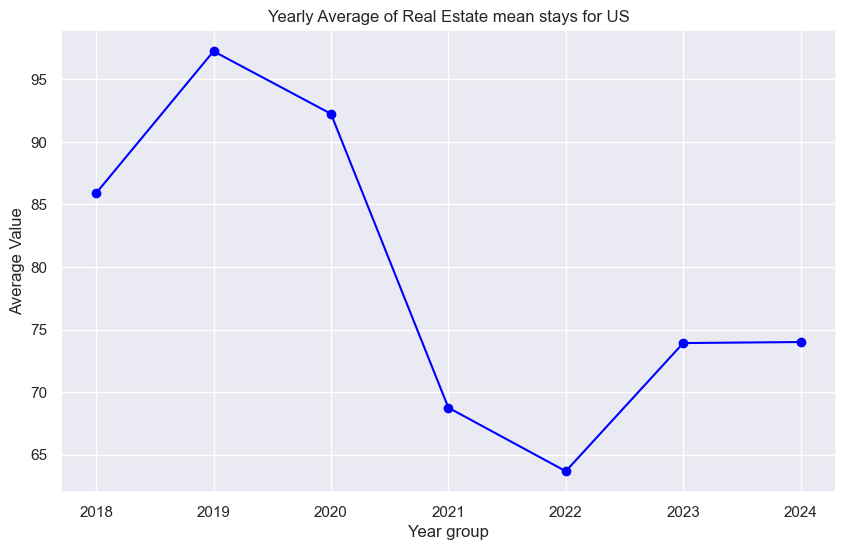

In [68]:
US_mean_numeric_data  = US_mean_numeric_data.T  # Transpose for easier handling
US_mean_numeric_data .index = pd.to_datetime(US_mean_numeric_data .index)
US_mean_numeric_data ['Year group'] = US_mean_numeric_data .index.year

# Group by year and calculate the average
yearly_data = US_mean_numeric_data .groupby('Year group').mean()

# Plot yearly data
plt.figure(figsize=(10, 6))
plt.plot(yearly_data.index, yearly_data.values, marker='o', linestyle='-', color='blue')
plt.title("Yearly Average of Real Estate mean stays for US")
plt.xlabel("Year group")
plt.ylabel("Average Value")
plt.grid(True)
plt.show()


Median days on Market

In [69]:
non_numeric_columns = ['RegionID', 'RegionName', 'RegionType', 'StateName','SizeRank']

# Keep non-numerical columns
df_median_result = df2[non_numeric_columns].copy()

# Add numerical columns
df_median_sum = df2.drop(columns=non_numeric_columns).add(df4.drop(columns=non_numeric_columns), fill_value=0)

# Combine back
df_median_result = pd.concat([df_median_result, df_median_sum], axis=1)

In [70]:
df_median_result.head(5)

,RegionID,RegionName,RegionType,StateName,SizeRank,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,102001,United States,country,NaN,0,63.0,52.0,51.0,51.0,54.0,...,58.0,55.0,50.0,44.0,43.0,45.0,46.0,49.0,51.0,21.0
1,394913,"New York, NY",msa,NY,1,113.0,94.0,86.0,89.0,95.0,...,88.0,88.0,81.0,71.0,69.0,72.0,76.0,78.0,80.0,28.0
2,753899,"Los Angeles, CA",msa,CA,2,48.0,44.0,45.0,46.0,48.0,...,47.0,46.0,43.0,40.0,41.0,42.0,43.0,44.0,46.0,20.0
3,394463,"Chicago, IL",msa,IL,3,72.0,57.0,56.0,58.0,61.0,...,53.0,51.0,46.0,40.0,41.0,42.0,43.0,43.0,45.0,13.0
4,394514,"Dallas, TX",msa,TX,4,47.0,41.0,40.0,41.0,43.0,...,60.0,56.0,50.0,43.0,43.0,45.0,48.0,53.0,58.0,33.0


In [71]:
# Filter data for United States
US_median_data = df_median_result[df_median_result['RegionName'] == 'United States']

# Drop non-numeric columns to focus on numerical data
US_median_numeric_data = US_median_data.drop(columns=['RegionID', 'RegionName', 'RegionType', 'StateName', 'SizeRank'])

In [72]:
US_median_data

,RegionID,RegionName,RegionType,StateName,SizeRank,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,102001,United States,country,NaN,0,63.0,52.0,51.0,51.0,54.0,...,58.0,55.0,50.0,44.0,43.0,45.0,46.0,49.0,51.0,21.0


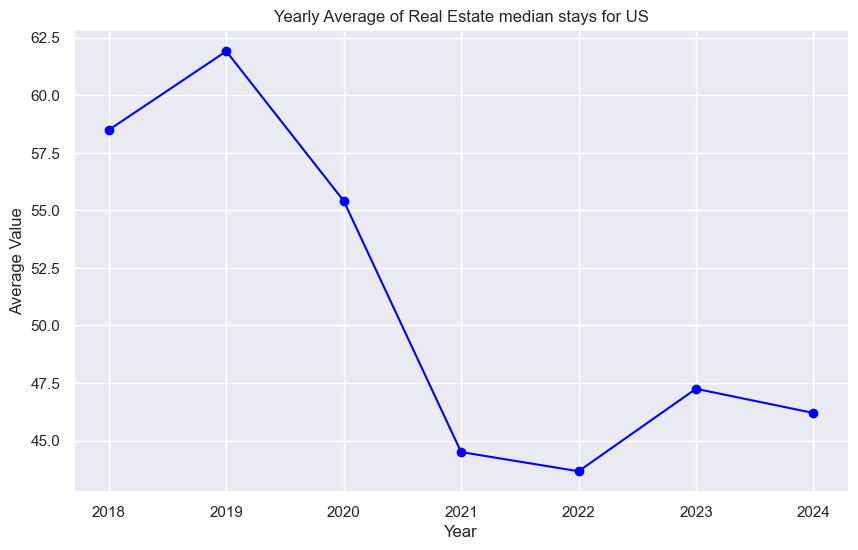

In [73]:
US_median_numeric_data = US_median_numeric_data.T  # Transpose for easier handling
US_median_numeric_data.index = pd.to_datetime(US_median_numeric_data.index)
US_median_numeric_data['Year'] = US_median_numeric_data.index.year

# Group by year and calculate the average
yearly_median_data = US_median_numeric_data.groupby('Year').mean()

# Plot yearly data
plt.figure(figsize=(10, 6))
plt.plot(yearly_median_data.index, yearly_median_data.values, marker='o', linestyle='-', color='blue')
plt.title("Yearly Average of Real Estate median stays for US")
plt.xlabel("Year")
plt.ylabel("Average Value")
plt.grid(True)
plt.show()

In [74]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'Metro_mean_days_to_close_uc_sfrcondo_sm_month.csv'  # Update the path if needed
data = pd.read_csv(file_path)
print(set(data["RegionName"]))

# # Exclude 'United States' row
# filtered_data = data[data['RegionName'] != 'United States']


# # Aggregating the yearly average if 'Year' is added
# numeric_data = filtered_data.set_index('RegionName').iloc[:, 5:]
# numeric_data = numeric_data.T  # Transpose for easier handling
# numeric_data.index = pd.to_datetime(numeric_data.index)
# numeric_data['Year'] = numeric_data.index.year
# yearly_data = numeric_data.groupby('Year').mean().T.reset_index()

# # Load city boundary shapefile (update the path)
# cities = gpd.read_file("geo/ne_110m_populated_places.shp")  # Update the path
# cities.rename(columns={'NAME': 'StateName'}, inplace=True)  # Adjust based on actual column names
# print(cities.head())

# # Merge city data with geographical boundaries
# merged = cities.merge(yearly_data, on='StateName', how='left')
# merged.head()

# # Plot the data on a U.S. map
# fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# merged.plot(column='2023',  # Replace with the desired year column
#             cmap='coolwarm',
#             legend=True,
#             legend_kwds={'label': 'Mean Days to Close'},
#             ax=ax,
#             edgecolor='black')

# ax.set_title('Mean Days to Close by City (2023)')
# plt.show()


{'Philadelphia, PA', 'Colorado Springs, CO', 'Salisbury, MD', 'Chillicothe, OH', 'Janesville, WI', 'Bozeman, MT', 'Astoria, OR', 'Lawton, OK', 'Payson, AZ', 'Shreveport, LA', 'Cullman, AL', 'Midland, TX', 'Walla Walla, WA', 'Sanford, NC', 'Waco, TX', 'Eugene, OR', 'Cape Coral, FL', 'Athens, GA', 'Carson City, NV', 'Freeport, IL', 'Oklahoma City, OK', 'Elko, NV', 'Battle Creek, MI', 'Dixon, IL', 'Warsaw, IN', 'Corning, NY', 'Lynchburg, VA', 'Corpus Christi, TX', 'Fort Madison, IA', 'Branson, MO', 'Albuquerque, NM', 'Brownsville, TX', 'Dalton, GA', 'Santa Cruz, CA', 'York, PA', 'Cambridge, MD', 'Shelton, WA', 'Athens, TN', 'Hobbs, NM', 'Blackfoot, ID', 'Stockton, CA', 'Olean, NY', 'Kokomo, IN', 'Jamestown, NY', 'Easton, MD', 'Burlington, NC', 'New Bern, NC', 'Providence, RI', 'Tyler, TX', 'Clewiston, FL', 'Jefferson City, MO', 'Madison, IN', 'The Villages, FL', 'Mobile, AL', 'Punta Gorda, FL', 'Albertville, AL', 'Torrington, CT', 'Raleigh, NC', 'Pittsfield, MA', 'Breckenridge, CO', 'Huds

## test

In [75]:
# !pip install cartopy

In [76]:
# !pip install tqdm
# !pip install openpyxl

In [77]:
import os
os.getcwd()

'C:\\Users\\asus\\Desktop\\mengyuan\\data preparation'

          City State  Value
1     New York    NY   57.0
2  Los Angeles    CA   34.0
3      Chicago    IL   43.0
4       Dallas    TX   21.0
5      Houston    TX   31.0



eocoding: 100%|██████████| 622/622 [05:44<00:00,  1.80it/s]

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


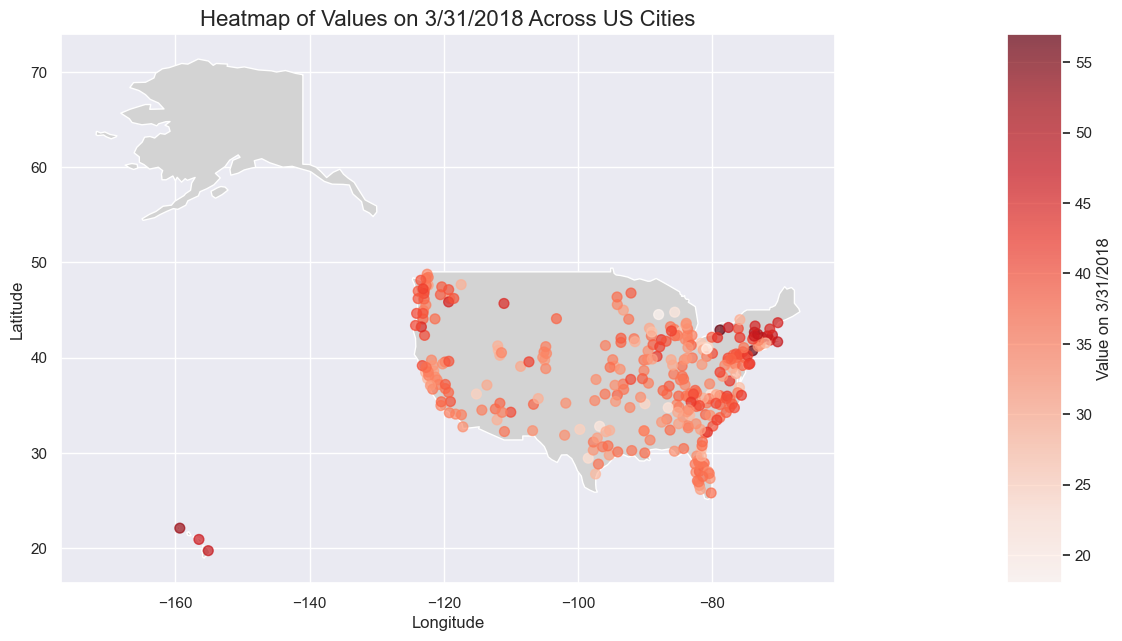

In [78]:
import pandas as pd
from tqdm import tqdm
from geopy.geocoders import Nominatim
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable


file_path = 'Metro_mean_days_to_close_uc_sfrcondo_sm_month.csv'  # Update the path if needed
data = pd.read_csv(file_path)[1:]
# print(data.head())
data['City'] = data['RegionName'].apply(lambda x:x.split(",")[0])
# print(data.head())
data = data[["City","StateName","2018-03-31"]]
data.rename(columns={"StateName": "State", "2018-03-31": "Value"}, inplace=True)
print(data.head())


data['Latitude'] = None
data['Longitude'] = None


geolocator = Nominatim(user_agent="geoapi")


for idx, row in tqdm(data.iterrows(), total=data.shape[0], desc="Geocoding"):
    location = geolocator.geocode(f"{row['City']}, {row['State']}", timeout=10)
    if location:
        data.at[idx, 'Latitude'] = location.latitude
        data.at[idx, 'Longitude'] = location.longitude


data = data.dropna(subset=['Latitude', 'Longitude'])


shapefile_path = '110m_cultural/ne_110m_admin_0_countries.shp'


usa = gpd.read_file(shapefile_path)
print(usa.columns)

# usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
usa = usa[usa['ADMIN'] == 'United States of America']


gdf = gpd.GeoDataFrame(
    data, 
    geometry=gpd.points_from_xy(data['Longitude'], data['Latitude']),
    crs="EPSG:4326"
)


fig, ax = plt.subplots(1, 1, figsize=(15, 10))
usa.plot(ax=ax, color='lightgrey')


norm = Normalize(vmin=data['Value'].min(), vmax=data['Value'].max())
scatter = ax.scatter(
    data['Longitude'], 
    data['Latitude'], 
    c=data['Value'], 
    cmap='Reds', 
    norm=norm, 
    s=50, 
    alpha=0.7
)


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(scatter, cax=cax)
cbar.set_label('Value on 3/31/2018', fontsize=12)


ax.set_title('Heatmap of Values on 3/31/2018 Across US Cities', fontsize=16)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()


In [79]:
data.to_excel("data_with_positons.xlsx")